In [ ]:
!pip install seaborn


Dataset loaded successfully.

Logistic Regression model trained successfully.

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     GPU (0)       1.00      1.00      1.00        17
     CPU (1)       1.00      1.00      1.00       108

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125


Confusion Matrix:


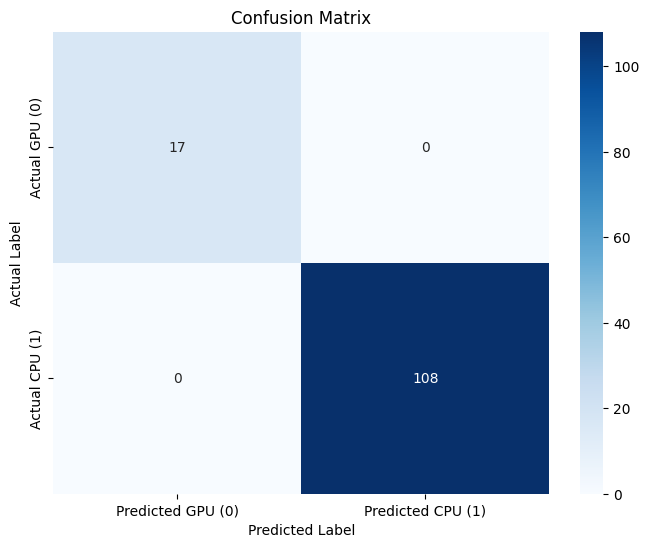

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load and Prepare the Data ---

# Load the dataset from the CSV file
try:
    df = pd.read_csv('C:/python_code/PYTORCH/GPU offloading/dataset_with_overhead.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'scheduler_choice_dataset.csv' not found. Make sure the file is in the correct directory.")
    exit()


# Define your features (X) and the target variable (y)
# We drop 'task_name' (it's constant) and 'gpu_mem_%' (low variance)
X = df.drop(['scheduler_choice', 'task_name', 'gpu_mem_%'], axis=1)
y = df['scheduler_choice']


# --- 2. Split Data into Training and Testing Sets ---

# Use 'stratify=y' to ensure the train and test sets have the same proportion
# of class labels as the original dataset. This is crucial for imbalanced data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,     # Use 25% of the data for testing
    random_state=42,    # Ensures the split is the same every time
    stratify=y          # <<< Important for imbalanced data!
)


# --- 3. Feature Scaling ---

# Scale features to have zero mean and unit variance using StandardScaler.
# This helps the logistic regression model converge faster and perform better.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Train the Logistic Regression Model ---

# Instantiate the model.
# 'class_weight="balanced"' automatically adjusts weights to penalize
# mistakes on the minority class more heavily.
model = LogisticRegression(
    class_weight='balanced', # <<< Important for imbalanced data!
    random_state=42
)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)
print("\nLogistic Regression model trained successfully.")


# --- 5. Make Predictions and Evaluate the Model ---

# Make predictions on the unseen test data
y_pred = model.predict(X_test_scaled)

# --- Evaluation Metrics ---

# Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Detailed Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['GPU (0)', 'CPU (1)']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted GPU (0)', 'Predicted CPU (1)'],
            yticklabels=['Actual GPU (0)', 'Actual CPU (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()

Random Forest model trained successfully.

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     GPU (0)       1.00      1.00      1.00        17
     CPU (1)       1.00      1.00      1.00       108

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125


Confusion Matrix:
[[ 17   0]
 [  0 108]]


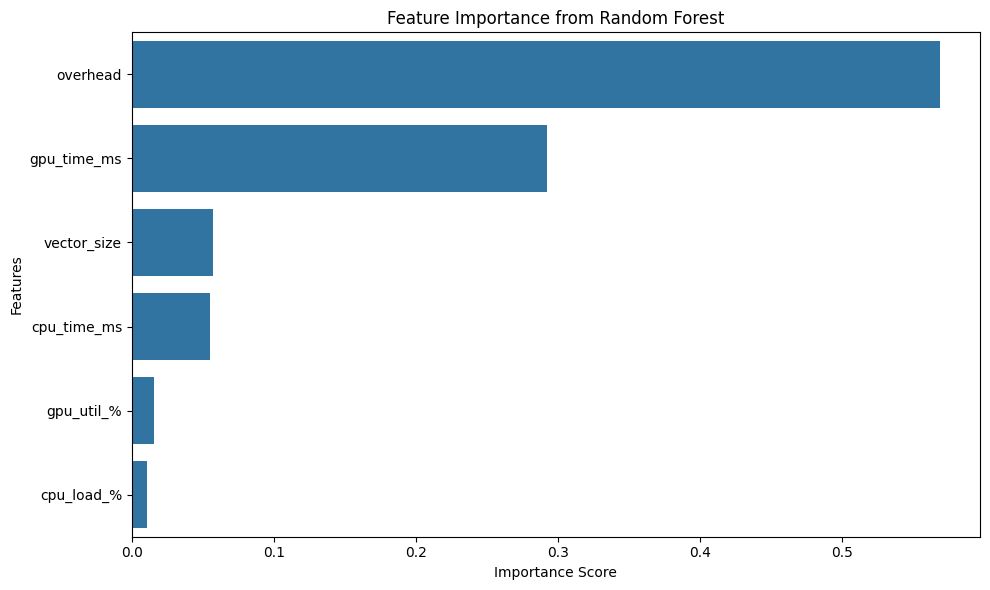

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load and Prepare the Data ---
df = pd.read_csv('C:/python_code/PYTORCH/GPU offloading/dataset_with_overhead.csv')

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# --- 3. Feature Scaling ---
# While not strictly necessary for Random Forest, it's good practice
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 4. Train the Random Forest Model ---
# 'n_estimators' is the number of trees in the forest.
# 'class_weight="balanced"' helps with the imbalanced dataset.
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train_scaled, y_train)
print("Random Forest model trained successfully.")


# --- 5. Make Predictions and Evaluate the Model ---
y_pred = model.predict(X_test_scaled)

print(f"\nModel Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['GPU (0)', 'CPU (1)']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# --- 6. Feature Importance ---
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance_random_forest.png')
plt.show()